#### Imports


In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import random
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

#### Functions

In [47]:
def read_data(file_name):
    data = pd.read_csv(file_name)
    feature_cols = []
    for label in data.columns:
        if label[0] == "X" or label[0] == "Y":
            feature_cols.append(label)
        elif label[0] == "R":
            break
    
    print(feature_cols)

    label_cols = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]
    x = data[feature_cols]
    y = data[label_cols]
    return x, y

In [63]:
def train_model_normal(x_train, y_train, n_estimators=400, random_state=12345, verbose = 1):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, verbose=verbose)
    rf.fit(
        x_train, y_train
    )
    return rf


In [49]:
def validate(rf, x_test, y_test):
    y_pred = rf.predict(x_test)
    distance = []
    direction = []

    for i in range(len(y_test)):
        error_x = y_test.iloc[i].iloc[0] - y_pred[i][0]
        error_y = y_test.iloc[i].iloc[1] - y_pred[i][1]
        distance.append(math.sqrt(error_x ** 2 + error_y**2))

        dp = y_test.iloc[i].iloc[2]  * y_pred[i][2] + y_test.iloc[i].iloc[3]  * y_pred[i][3]
        mag1 = math.sqrt(y_test.iloc[i].iloc[2] ** 2 + y_test.iloc[i].iloc[3] ** 2)
        mag2 = math.sqrt(y_pred[i][2] ** 2 + y_pred[i][3] ** 2)
        direction.append(math.degrees(math.acos(dp / mag1 / mag2)) * random.choice([1, -1]))

    return distance, direction

In [64]:

def train_val_number_of_trees(x_train, x_test, y_train, y_test, verbose=1):
    train_loss = []
    test_loss = []
    n_trees = np.linspace(10, 400, 10, dtype=int)

    rf = RandomForestRegressor(n_estimators=10, random_state=12345, warm_start=True, verbose=verbose)
    for n in n_trees:
        print(f"Running RandomForestRegressor on {n} trees")
        rf.n_estimators = n  # Increase number of trees
        rf.fit(x_train, y_train)  # Train the model incrementally
        
        # Predict on training and test data
        y_train_pred = rf.predict(x_train)
        y_test_pred = rf.predict(x_test)
        
        # Compute Mean Squared Error (MSE)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Store the errors
        train_loss.append(train_mse)
        test_loss.append(test_mse)

    return rf, n_trees, train_loss, test_loss


In [ ]:
def train_on_epochs()

#### Run the Model (Call Functions)

In [56]:
# set up model
data = "output_x3_y2.csv"
print("Reading Data...")
x, y = read_data(data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12345)

Reading Data...
['XStripID1', 'XStripID2', 'XStripID3', 'YStripID1', 'YStripID2', 'XStripEnergy1', 'XStripEnergy2', 'XStripEnergy3', 'YStripEnergy1', 'YStripEnergy2']


In [ ]:
# run the model - normal
print("Training model...")
rf, train_loss, test_loss = train_model_normal(x_train, y_train, verbose = 0)
print("Validating model...")
distance, direction = validate(rf, x_test, y_test)

In [65]:
#actually run the model - see effect of # of trees
print("Training model...")
rf, n_trees, train_loss, test_loss = train_val_number_of_trees(x_train, x_test, y_train, y_test, verbose = 0)
print("Validating model...")
distance, direction = validate(rf, x_test, y_test)
print("Done")

Training model...
Running RandomForestRegressor on 10 trees
Running RandomForestRegressor on 53 trees
Running RandomForestRegressor on 96 trees
Running RandomForestRegressor on 140 trees
Running RandomForestRegressor on 183 trees
Running RandomForestRegressor on 226 trees
Running RandomForestRegressor on 270 trees
Running RandomForestRegressor on 313 trees
Running RandomForestRegressor on 356 trees
Running RandomForestRegressor on 400 trees
Validating model...
Done


#### Plots + Results

Average distance: 0.14772476317756233


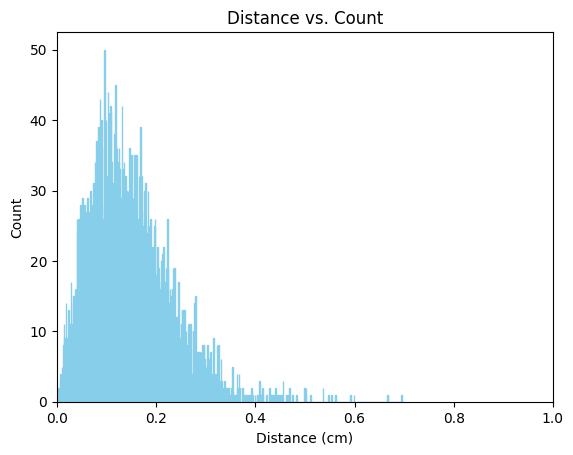

In [66]:
# Plots Distance vs Count

print("Average distance:", np.average(distance))
plt.hist(distance, bins=500, edgecolor='skyblue')
bottom, top = plt.ylim()
# plt.ylim(0, 10)
plt.xlim(0, 1)
plt.xlabel('Distance (cm)')
plt.ylabel('Count')
plt.title('Distance vs. Count')
plt.show()

Average direction: 0.7595454561787602


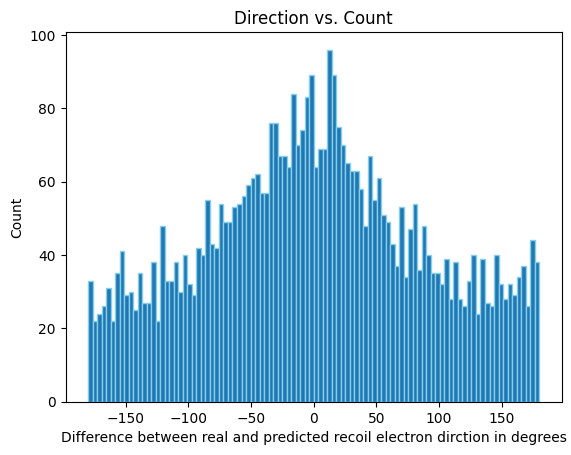

In [67]:
# Plots Direction vs Count

print("Average direction:", np.average(direction))
plt.hist(direction, bins=100, edgecolor='skyblue')
plt.xlabel('Difference between real and predicted recoil electron dirction in degrees')
plt.ylabel('Count')
plt.title('Direction vs. Count')
plt.show()

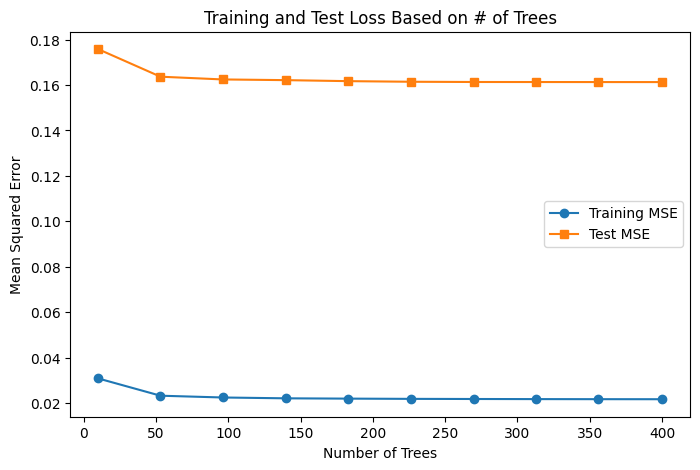

In [68]:
# FOR WHEN TRAIN_VAL_NUMBER_OF_TREES() IS CALLED: 
plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_loss, label="Training MSE", marker="o")
plt.plot(n_trees, test_loss, label="Test MSE", marker="s")
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Loss Based on # of Trees")
plt.legend()
plt.show()